# Bridging the Gaps in LLM Interpretability of Unstructured Data with Knowledge Graphs
- Uses StrictJSON to parse the Knowledge Graph: https://github.com/tanchongmin/strictjson

# Import required packages

In [1]:
!pip install strictjson

     ---------------------------------------- 0.0/103.4 kB ? eta -:--:--
     -------------------------------------- 103.4/103.4 kB 5.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/220.9 kB ? eta -:--:--
   ---------------------------------------- 220.9/220.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/80.9 kB ? eta -:--:--
   ---------------------------------------- 80.9/80.9 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.6 kB ? eta -:--:--
   ---------------------------------------- 75.6/75.6 kB ? eta 0:00:00
   ---------------------------------------- 0.0/77.9 kB ? eta -:--:--
   ---------------------------------------- 77.9/77.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/407.9 kB ? eta -:--:--
   --------------------------------------- 407.9/407.9 kB 24.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------------------------------------- 1.9/1.9 M

In [4]:
!pip install dotenv
!pip install openai

  Using cached dotenv-0.0.5.tar.gz (2.4 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install backend dependencies did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
        Using cached wheel-0.43.0-py3-none-any.whl.metadata (2.2 kB)
        Using cached distribute-0.7.3.zip (145 kB)
        Installing build dependencies: started
        Installing build dependencies: finished with status 'done'
        Getting requirements to build wheel: started
        Getting requirements to build wheel: finished with status 'done'
        Installing backend dependencies: started
        Installing backend dependencies: finished with status 'done'
        Preparing metadata (pyproject.toml): started
        Preparing metadata (pyproject.toml): finished with status 'error'
        error: subprocess-exited-with-error
      
        Ã— Preparing metadata (pyproject.toml) did not run successfully.
        â”‚ exit code: 1
        â•°â”€> [6 lines of output]
            usage: setup.py [global_opts] cmd1 [

In [8]:
from strictjson import *
import os
import openai
from openai import OpenAI
import networkx as nx
import matplotlib.pyplot as plt
from dotenv import load_dotenv

ModuleNotFoundError: No module named 'dotenv'

In [22]:
load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")
# os.environ["OPENAI_API_KEY"] = api_key
os.environ["OPENAI_API_KEY"] = api_key



# Utility functions

In [25]:
def chat(system_prompt, user_prompt = '', model = 'gpt-4', temperature = 0, **kwargs):
    ''' This replies the user based on a system prompt and user prompt to call OpenAI Chat Completions API '''
    client = OpenAI()
    response = client.chat.completions.create(
        model=model,
        temperature = temperature,
        messages=[
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_prompt}
        ],
        **kwargs
    )
    res = response.choices[0].message.content
    return res

In [11]:
def plot_graph(kg):
    ''' Plots graph based on knowledge graph '''
    # Create graph
    G = nx.DiGraph()
    G.add_edges_from((source, target, {'relation': relation}) for source, relation, target in kg)

    # Plot the graph
    plt.figure(figsize=(10,6), dpi=300)
    pos = nx.spring_layout(G, k=3, seed=0)

    nx.draw_networkx_nodes(G, pos, node_size=1500)
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    nx.draw_networkx_labels(G, pos, font_size=12)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    # Display the plot
    plt.axis('off')
    plt.show()

## Step 1: Generate knowledge graph from context

In [26]:
context ='''
The sun is about to act like your college roommate freshman year—it’s getting totally blacked out on a Monday afternoon.

A total solar eclipse will be visible across North America today, an event that won’t take place in the US again until 2044. The path of totality will cut through Middle America like a country music tour bus, allowing 30+ million people from Texas to Maine to see the sun, moon, and Earth align perfectly in the early afternoon.

Bigger than the Super Bowl and Taylor Swift
Americans are treating the eclipse like the YOLO moment it is and spending big: It’s projected to deliver a $6 billion infusion to the US economy—not far off the combined impact of Taylor Swift’s Eras Tour ($5.7 billion) and the 2023 Super Bowl ($1.3 billion). Millions are making a vacation out of it, shelling out for flights, hotels, and tickets to viewing parties along the path of totality. And cities big and small are at full capacity.

Indianapolis is preparing for 500,000 visitors—more than 7x the attendance of the Super Bowl it hosted in 2012.
Niagara Falls expects to host up to 1 million people for the eclipse. It typically gets 14 million visitors…throughout the entire year.
Brands are also cashing in: Companies are rolling out eclipse-themed promotions, such as Delta’s two flights that track the path of totality.

Scientists are amped
The people most excited about the eclipse are scientists, who for centuries have conducted experiments that can only be done in syzygy. While the moon is blacking out the sun for several minutes, they’ll be scrambling to gather data about the solar system and also observe how animals behave when day suddenly turns to night. Did you know that helium was discovered during the 1868 eclipse?

Enjoy it while you can. With the moon moving away from Earth at a rate of 1.5 inches per year, total eclipses will eventually become a thing of the past in about 600 million years, according to Johns Hopkins professor Sabine Stanley.
'''

In [100]:
import re
def normalize_text(text):
    text = re.sub(r'[^\S\n]+', ' ', text)
    text = text.strip()
    return text

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\seanw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seanw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [88]:
processed_text = normalize_text(context)
processed_text = lemmatize_text(processed_text)
processed_text = remove_stop_words(processed_text)
print("Original Text:", context)
print("Processed Text:", processed_text)

Original Text: 
The sun is about to act like your college roommate freshman year—it’s getting totally blacked out on a Monday afternoon.

A total solar eclipse will be visible across North America today, an event that won’t take place in the US again until 2044. The path of totality will cut through Middle America like a country music tour bus, allowing 30+ million people from Texas to Maine to see the sun, moon, and Earth align perfectly in the early afternoon.

Bigger than the Super Bowl and Taylor Swift
Americans are treating the eclipse like the YOLO moment it is and spending big: It’s projected to deliver a $6 billion infusion to the US economy—not far off the combined impact of Taylor Swift’s Eras Tour ($5.7 billion) and the 2023 Super Bowl ($1.3 billion). Millions are making a vacation out of it, shelling out for flights, hotels, and tickets to viewing parties along the path of totality. And cities big and small are at full capacity.

Indianapolis is preparing for 500,000 visito

In [89]:
res = strict_json(system_prompt = '''You are a knowledge graph builder. 
You are to output relations between two objects in the form (object_1, relation, object_2). 
All information about dates must be included.
Example Input: John bought a laptop
Example Output: [('John', 'bought', 'laptop')]
Example Input: John built a house in 2019
Example Output: [('John', 'built', 'house'), ('house', 'built in', '2019')]''',
                    user_prompt = context,
                    output_format = {"List of triplets": "List of triplets of the form (object_1, relation, object_2), type: list"})
print(res)

{'List of triplets': [('sun', 'will be visible across', 'North America'), ('event', 'take place in', 'US'), ('path of totality', 'cut through', 'Middle America'), ('30+ million people', 'will see', 'sun, moon, and Earth align perfectly'), ('Americans', 'are treating', 'eclipse like the YOLO moment'), ('eclipse', 'projected to deliver', '$6 billion infusion to the US economy'), ('millions', 'are making', 'vacation out of it'), ('cities', 'are at', 'full capacity'), ('Indianapolis', 'is preparing for', '500,000 visitors'), ('Niagara Falls', 'expects to host', 'up to 1 million people'), ('Companies', 'are rolling out', 'eclipse-themed promotions'), ('scientists', 'are most excited about', 'eclipse'), ('moon', 'is blacking out', 'sun'), ('they', 'will be scrambling to gather', 'data about the solar system and also observe how animals behave'), ('helium', 'was discovered during', '1868 eclipse'), ('total eclipses', 'will eventually become', 'a thing of the past in about 600 million years')]

In [90]:
kg = res['List of triplets']

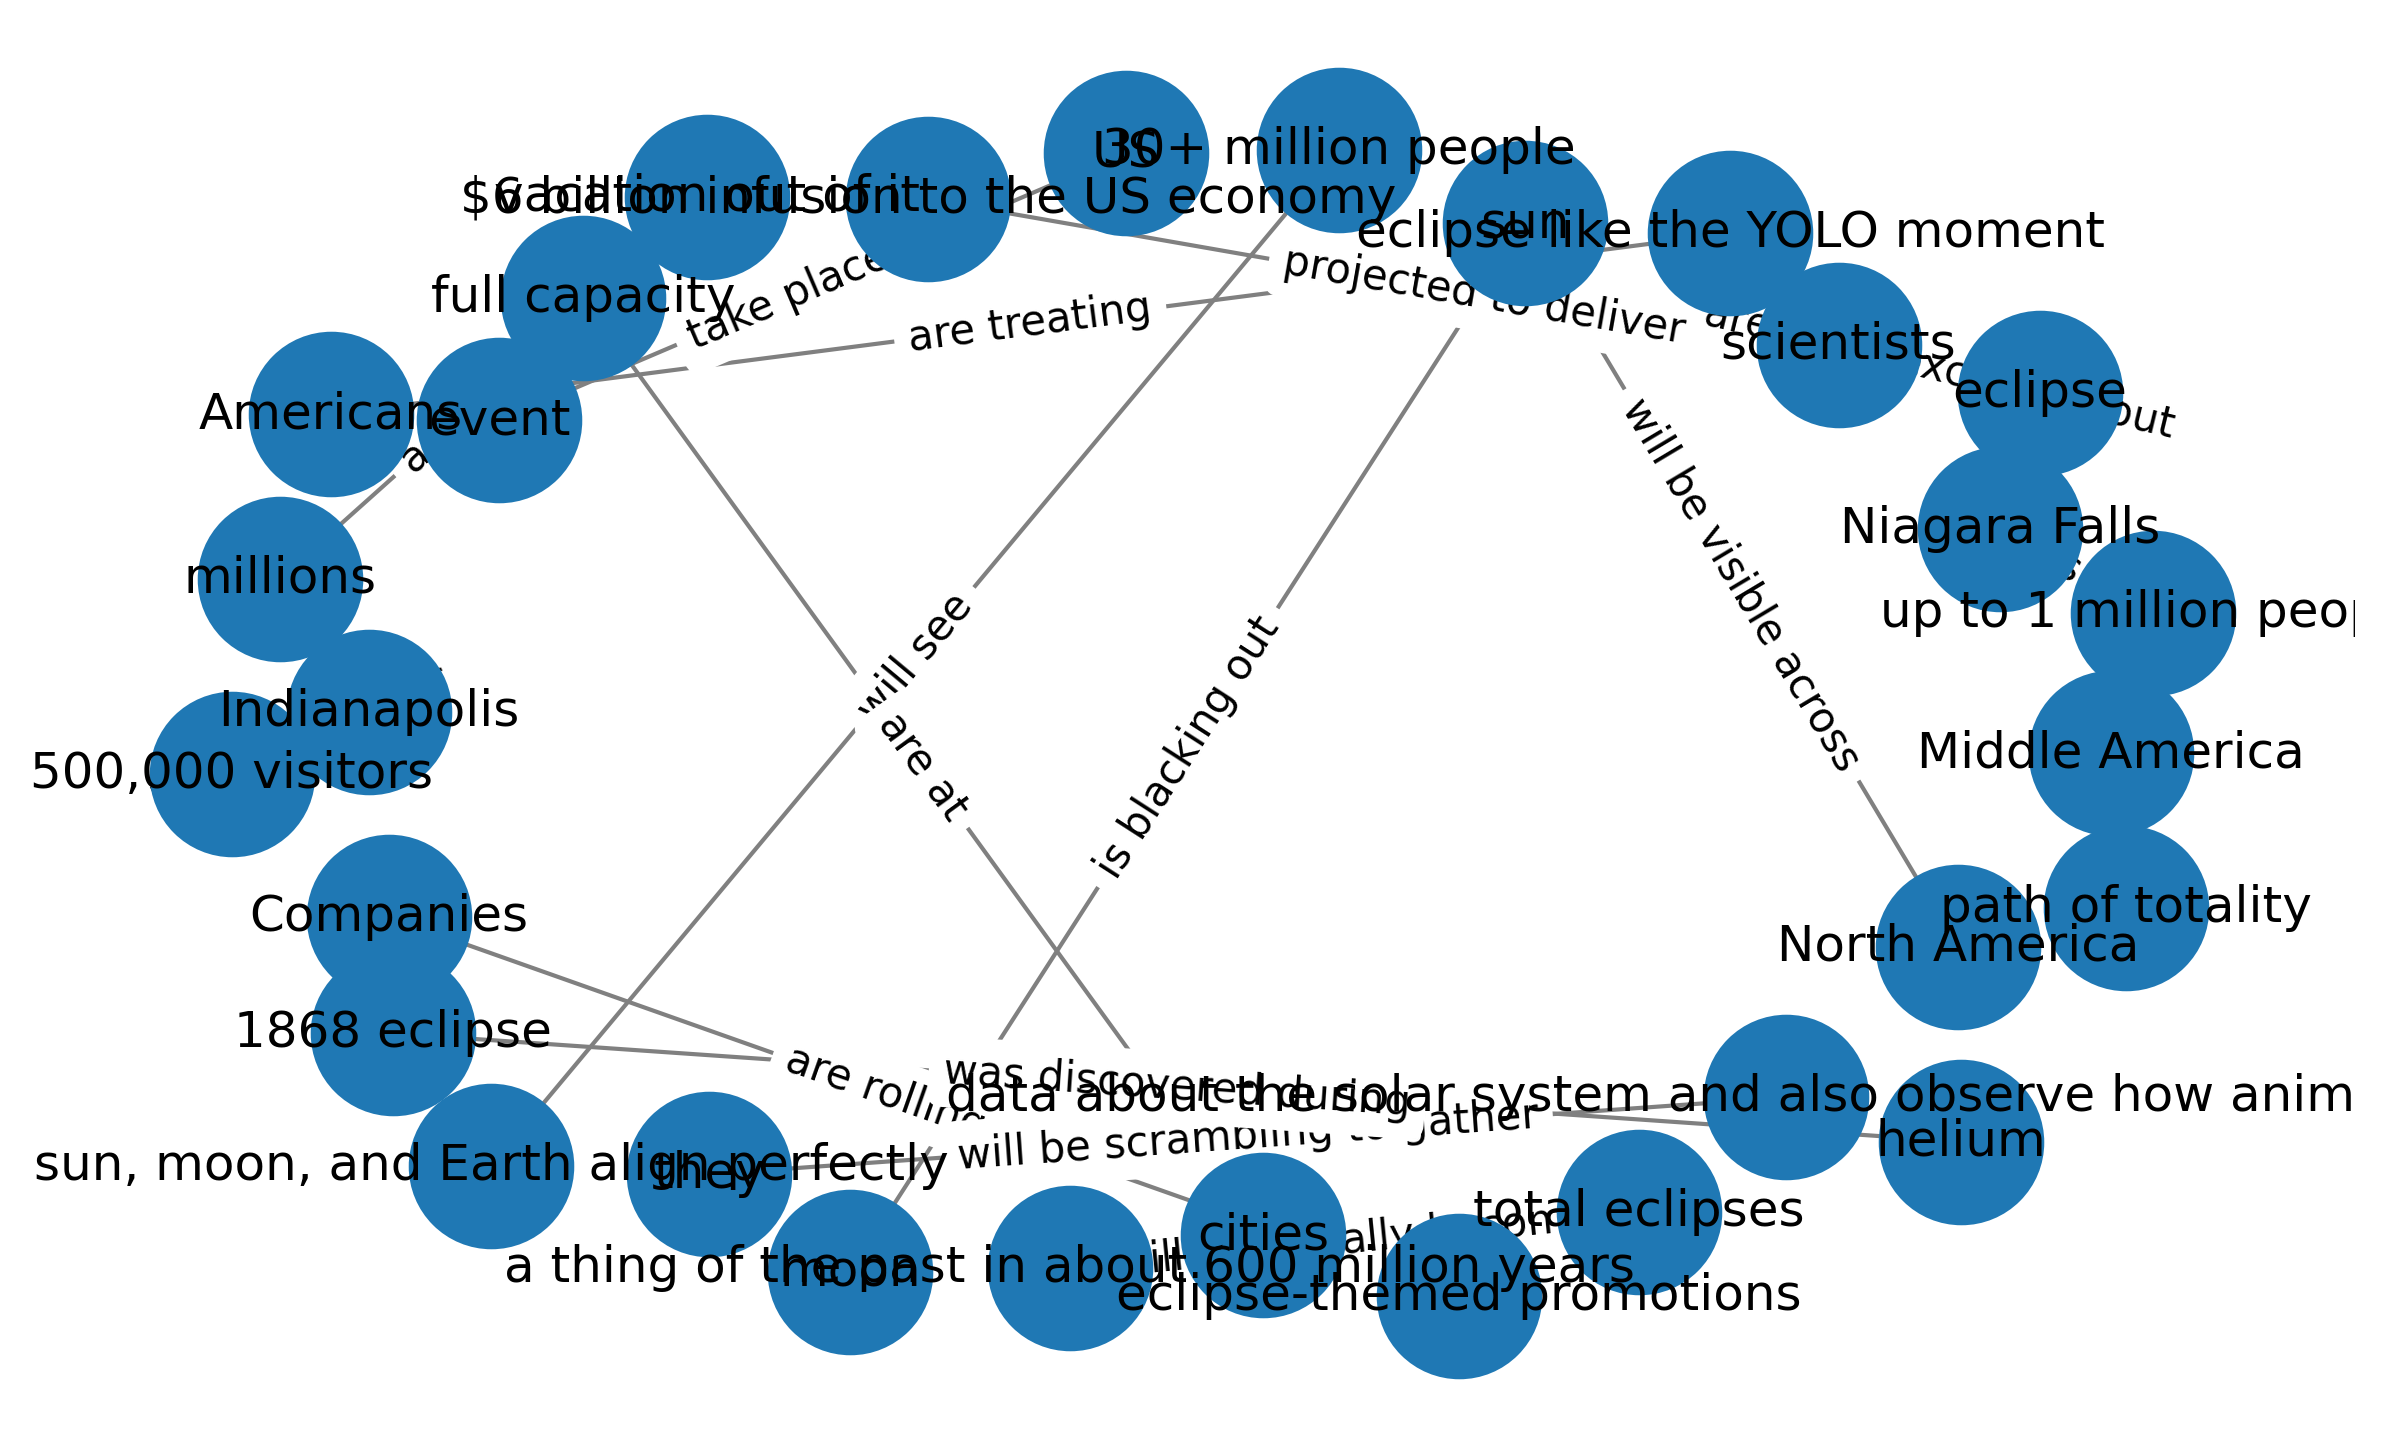

In [91]:
plot_graph(kg)

# Step 2: Parse Knowledge Graph
- Retrieve only triplets that are relevant to the question by using GPT to parse through
- Can also do by cosine similarity, or entity matching, though performance may be worse off

Sean Added tfidf and cosine sim

In [101]:
triplets_text = ["{} {} {}".format(src, rel, trg) for src, rel, trg in kg]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(triplets_text)

In [109]:
question = "What is the significance of the solar eclipse?"
query_vector = vectorizer.transform([question])
similarity_scores = cosine_similarity(query_vector, tfidf_matrix)[0]
print(similarity_scores)

[0.         0.         0.10991797 0.         0.2584588  0.21571194
 0.11680477 0.         0.13323449 0.         0.08266647 0.09147966
 0.17931133 0.2383199  0.08289415 0.21608571]


In [125]:
import numpy as np

threshold = 0.2
relevant_indices = np.where(similarity_scores > threshold)[0]
relevant_triplets = [kg[i] for i in relevant_indices]

print(f"Relevant Triplets: {relevant_triplets}")


Relevant Triplets: [('Americans', 'are treating', 'eclipse like the YOLO moment'), ('eclipse', 'projected to deliver', '$6 billion infusion to the US economy'), ('they', 'will be scrambling to gather', 'data about the solar system and also observe how animals behave'), ('total eclipses', 'will eventually become', 'a thing of the past in about 600 million years')]


In [126]:
res = strict_json(system_prompt = f'''You are a knowledge graph parser. 
Only output the triplets that are relevant to the question.
Knowledge Graph: {relevant_triplets}''',
                    user_prompt = f'''Question: {question}''',
                    output_format = {"Parsed Knowledge Graph": "List of triplets of the form (object1, relation, object2), type: list"})
print(res)

{'Parsed Knowledge Graph': [('eclipse', 'projected to deliver', '$6 billion infusion to the US economy'), ('they', 'will be scrambling to gather', 'data about the solar system and also observe how animals behave')]}


In [127]:
parsed_kg = res['Parsed Knowledge Graph']

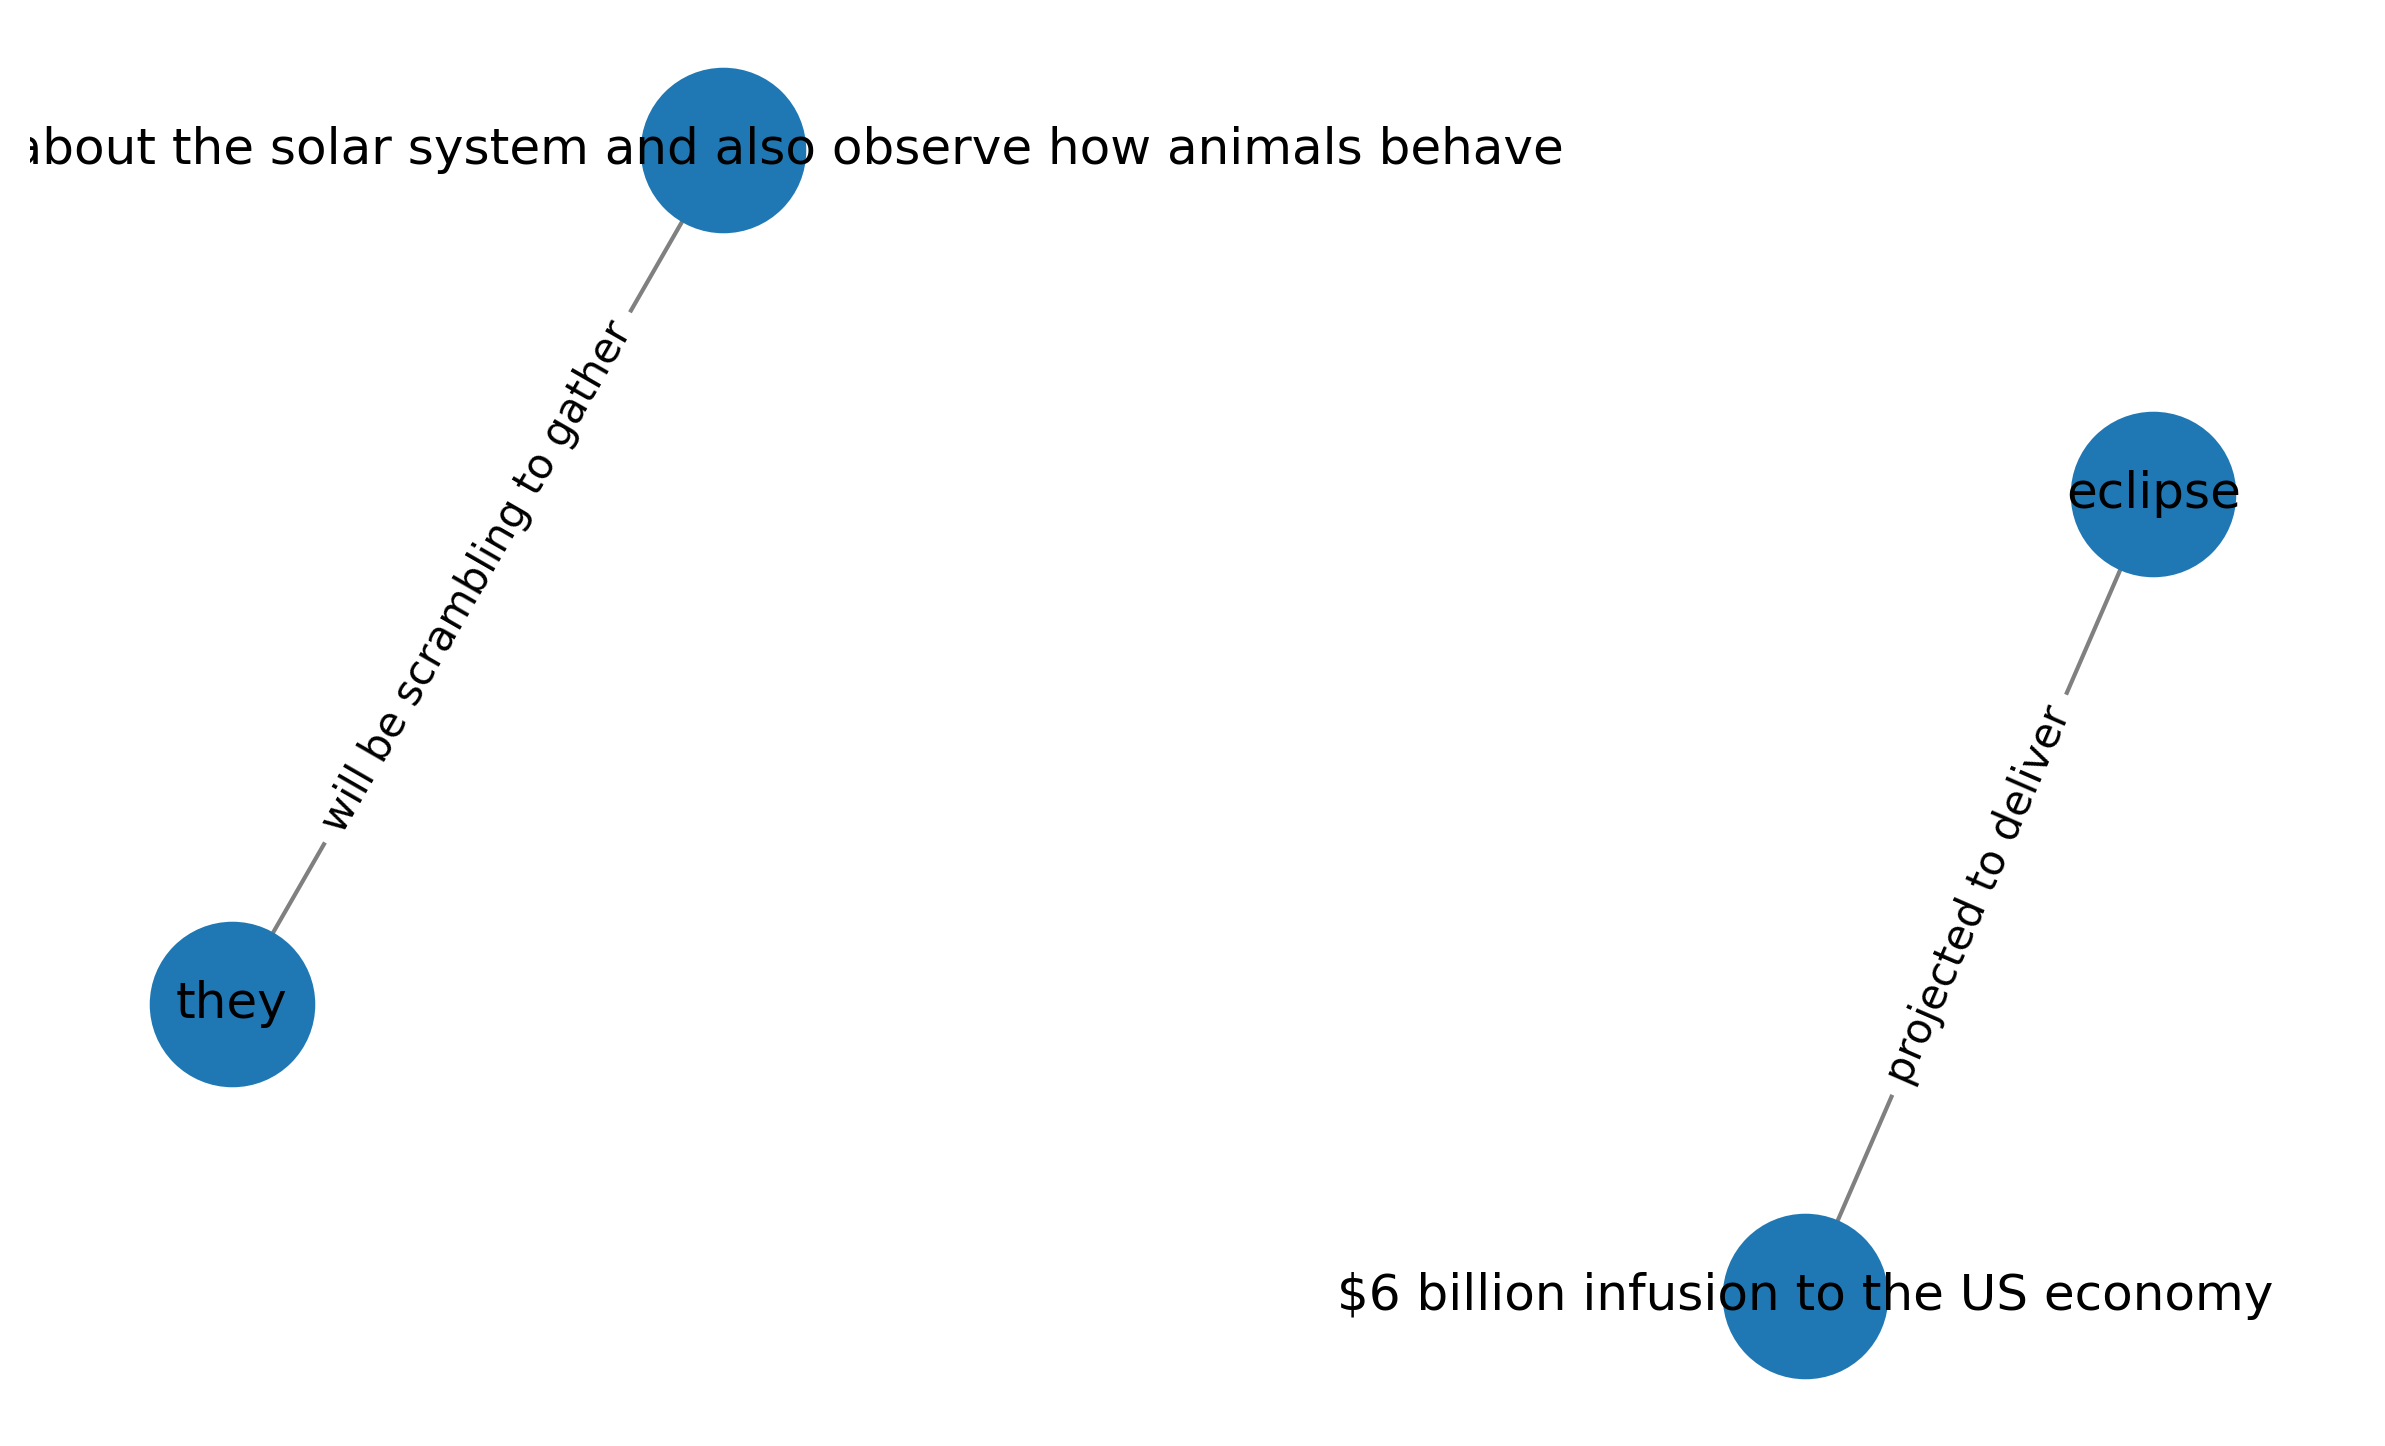

In [128]:
plot_graph(parsed_kg)

# Step 3: Use Parsed Knowledge Graph to Answer Question

In [129]:
res = strict_json(system_prompt = f'''Use the knowledge graph to answer the following question. 
If you are unsure, output 'No Info'
Knowledge Graph: {parsed_kg}''',
                    user_prompt = f'''Question: {question}''',
                    output_format = {"Answer": "Answer question using knowledge graph"})
print('Question:', question)
print('Answer with Parsed Knowledge Graph:', res['Answer'])

Question: What is the significance of the solar eclipse?
Answer with Parsed Knowledge Graph: No Info


In [130]:
print('Question:', question)
print('GPT4-enhanced answer with Parsed Knowledge Graph:', chat(f'''Use the knowledge graph to answer the following question. 
If you are unsure, output 'No Info'
Knowledge Graph: {parsed_kg}''',
                    user_prompt = f'''Question: {question}'''))

Question: What is the significance of the solar eclipse?
GPT4-enhanced answer with Parsed Knowledge Graph: The solar eclipse is significant as it is projected to deliver a $6 billion infusion to the US economy. Additionally, it provides an opportunity for data gathering about the solar system and observation of animal behavior.


In [118]:
print('Question:', question)
print('Answer with in-prompt context:', chat(f"Context: {context}\nQuestion: {question}"))

Question: What is the significance of the solar eclipse?
Answer with in-prompt context: The solar eclipse is significant for several reasons. Firstly, it's a rare astronomical event that won't take place in the US again until 2044, making it a unique spectacle for millions of people. Economically, it's projected to deliver a $6 billion infusion to the US economy as people spend on travel, accommodation, and viewing parties. For scientists, the eclipse provides a rare opportunity to conduct experiments and gather data about the solar system, as well as observe how animals behave when day suddenly turns to night. Lastly, it's a reminder of the constant changes in our solar system, as total eclipses will eventually become a thing of the past due to the moon moving away from Earth.
